In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 1. import data
nyc_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
nyc_df.shape

(300698, 53)

In [4]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
nyc_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype

nyc_df['Created Date']=pd.to_datetime(nyc_df['Created Date'])
nyc_df['Closed Date']=pd.to_datetime(nyc_df['Closed Date'])

In [7]:
nyc_df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [10]:
nyc_df.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2164
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Cross Street 1                    49279
Cross Street 2                    49779
Address Type                       2815
City                               2614
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                               0
X Coordinate (State Plane)         3540
Y Coordinate (State Plane)         3540
Park Facility Name                    0


In [11]:
nyc_df.dropna(axis=1,thresh=100000,inplace=True)   # droping columns where more than 1Lakh values are missing

In [12]:
nyc_df.shape

(300698, 39)

In [12]:
nyc_df.drop(['Descriptor','Incident Address','Street Name','Cross Street 1','Cross Street 2','Latitude','Longitude','Location',
                        'X Coordinate (State Plane)','Y Coordinate (State Plane)'],axis=1,inplace=True)

In [14]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [15]:
nyc_df['Location Type'].fillna(nyc_df['Location Type'].mode()[0],inplace=True)

In [16]:
nyc_df.dropna(subset=['School Region'],inplace=True)

In [17]:
def time_mins (rows):           # returns the time in minutes 
    t=rows[0]
    
    if pd.isnull(t):
        return np.NaN
    else:
        return t.seconds/60

In [22]:
# ignore the columns whose data is missing as we will not be using them for analysis

In [18]:
# 2. create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.
nyc_df['Request Closing Time'] = nyc_df['Closed Date']-nyc_df['Created Date']
nyc_df['Request Closing Time(in mins)'] = nyc_df[['Request Closing Time']].apply(time_mins,axis=1)

In [19]:
nyc_df.shape

(300697, 41)

In [20]:
nyc_df[['Request Closing Time','Request Closing Time(in mins)','Status']]
#as we can see NaN -- open, therefore we can assume that all closing time with NaN are not closed yet

,Request Closing Time,Request Closing Time(in mins),Status
0,0 days 00:55:15,55.250000,Closed
1,0 days 01:26:16,86.266667,Closed
2,0 days 04:51:31,291.516667,Closed
3,0 days 07:45:14,465.233333,Closed
4,0 days 03:27:02,207.033333,Closed
...,...,...,...
300693,NaT,NaN,Open
300694,0 days 02:00:31,120.516667,Closed
300695,0 days 03:07:17,187.283333,Closed
300696,0 days 04:05:33,245.550000,Closed


In [21]:

# Provide major insights/patterns that you can offer in a visual format (graphs or tables);
# at least 4 major conclusions that you can come up with after generic data mining.

[Text(0, 0, 'Closed'),
 Text(1, 0, 'Open'),
 Text(2, 0, 'Assigned'),
 Text(3, 0, 'Draft')]

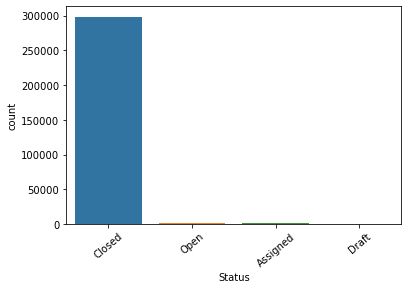

In [22]:
plot = sns.countplot(x='Status',data=nyc_df)

plot.set_xticklabels(plot.get_xticklabels(),rotation=40)

In [24]:
nyc_df['Agency'].unique()

array(['NYPD'], dtype=object)

In [25]:
nyc_df['Agency Name'].unique()

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [26]:
nyc_df['Agency Name'].replace(['NYPD'],'New York City Police Department',inplace=True)

In [27]:
nyc_df['Agency Name'].unique()

array(['New York City Police Department', 'Internal Affairs Bureau'],
      dtype=object)

In [28]:
nyc_df['Agency Name'].value_counts()

New York City Police Department    300691
Internal Affairs Bureau                 6
Name: Agency Name, dtype: int64

[Text(0, 0, 'New York City Police Department'),
 Text(1, 0, 'Internal Affairs Bureau')]

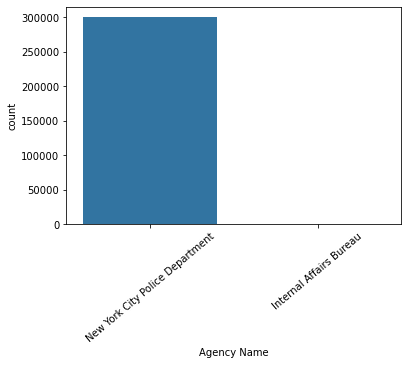

In [29]:
plot = sns.countplot(x='Agency Name',data=nyc_df)

plot.set_xticklabels(plot.get_xticklabels(),rotation=40)

<AxesSubplot:>

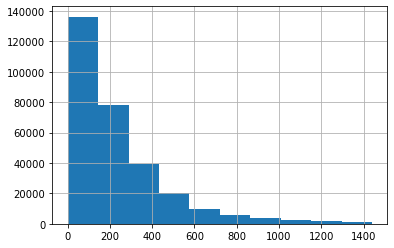

In [31]:
nyc_df['Request Closing Time(in mins)'].hist()

In [32]:
nyc_df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee'], dtype=object)

In [33]:
nyc_df['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Illegal Parking'),
 Text(3, 0, 'Derelict Vehicle'),
 Text(4, 0, 'Noise - Commercial'),
 Text(5, 0, 'Noise - House of Worship'),
 Text(6, 0, 'Posting Advertisement'),
 Text(7, 0, 'Noise - Vehicle'),
 Text(8, 0, 'Animal Abuse'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Traffic'),
 Text(11, 0, 'Drinking'),
 Text(12, 0, 'Bike/Roller/Skate Chronic'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Noise - Park'),
 Text(15, 0, 'Homeless Encampment'),
 Text(16, 0, 'Urinating in Public'),
 Text(17, 0, 'Graffiti'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks'),
 Text(20, 0, 'Ferry Complaint'),
 Text(21, 0, 'Agency Issues'),
 Text(22, 0, 'Squeegee')]

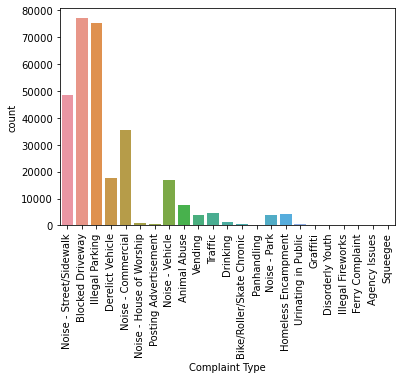

In [40]:
plot = sns.countplot(x='Complaint Type',data=nyc_df)

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(1, 0, 'Blocked Driveway'),
 Text(2, 0, 'Illegal Parking'),
 Text(3, 0, 'Derelict Vehicle'),
 Text(4, 0, 'Noise - Commercial'),
 Text(5, 0, 'Noise - House of Worship'),
 Text(6, 0, 'Posting Advertisement'),
 Text(7, 0, 'Noise - Vehicle'),
 Text(8, 0, 'Animal Abuse'),
 Text(9, 0, 'Vending'),
 Text(10, 0, 'Traffic'),
 Text(11, 0, 'Drinking'),
 Text(12, 0, 'Bike/Roller/Skate Chronic'),
 Text(13, 0, 'Panhandling'),
 Text(14, 0, 'Noise - Park'),
 Text(15, 0, 'Homeless Encampment'),
 Text(16, 0, 'Urinating in Public'),
 Text(17, 0, 'Graffiti'),
 Text(18, 0, 'Disorderly Youth'),
 Text(19, 0, 'Illegal Fireworks'),
 Text(20, 0, 'Ferry Complaint'),
 Text(21, 0, 'Agency Issues'),
 Text(22, 0, 'Squeegee')]

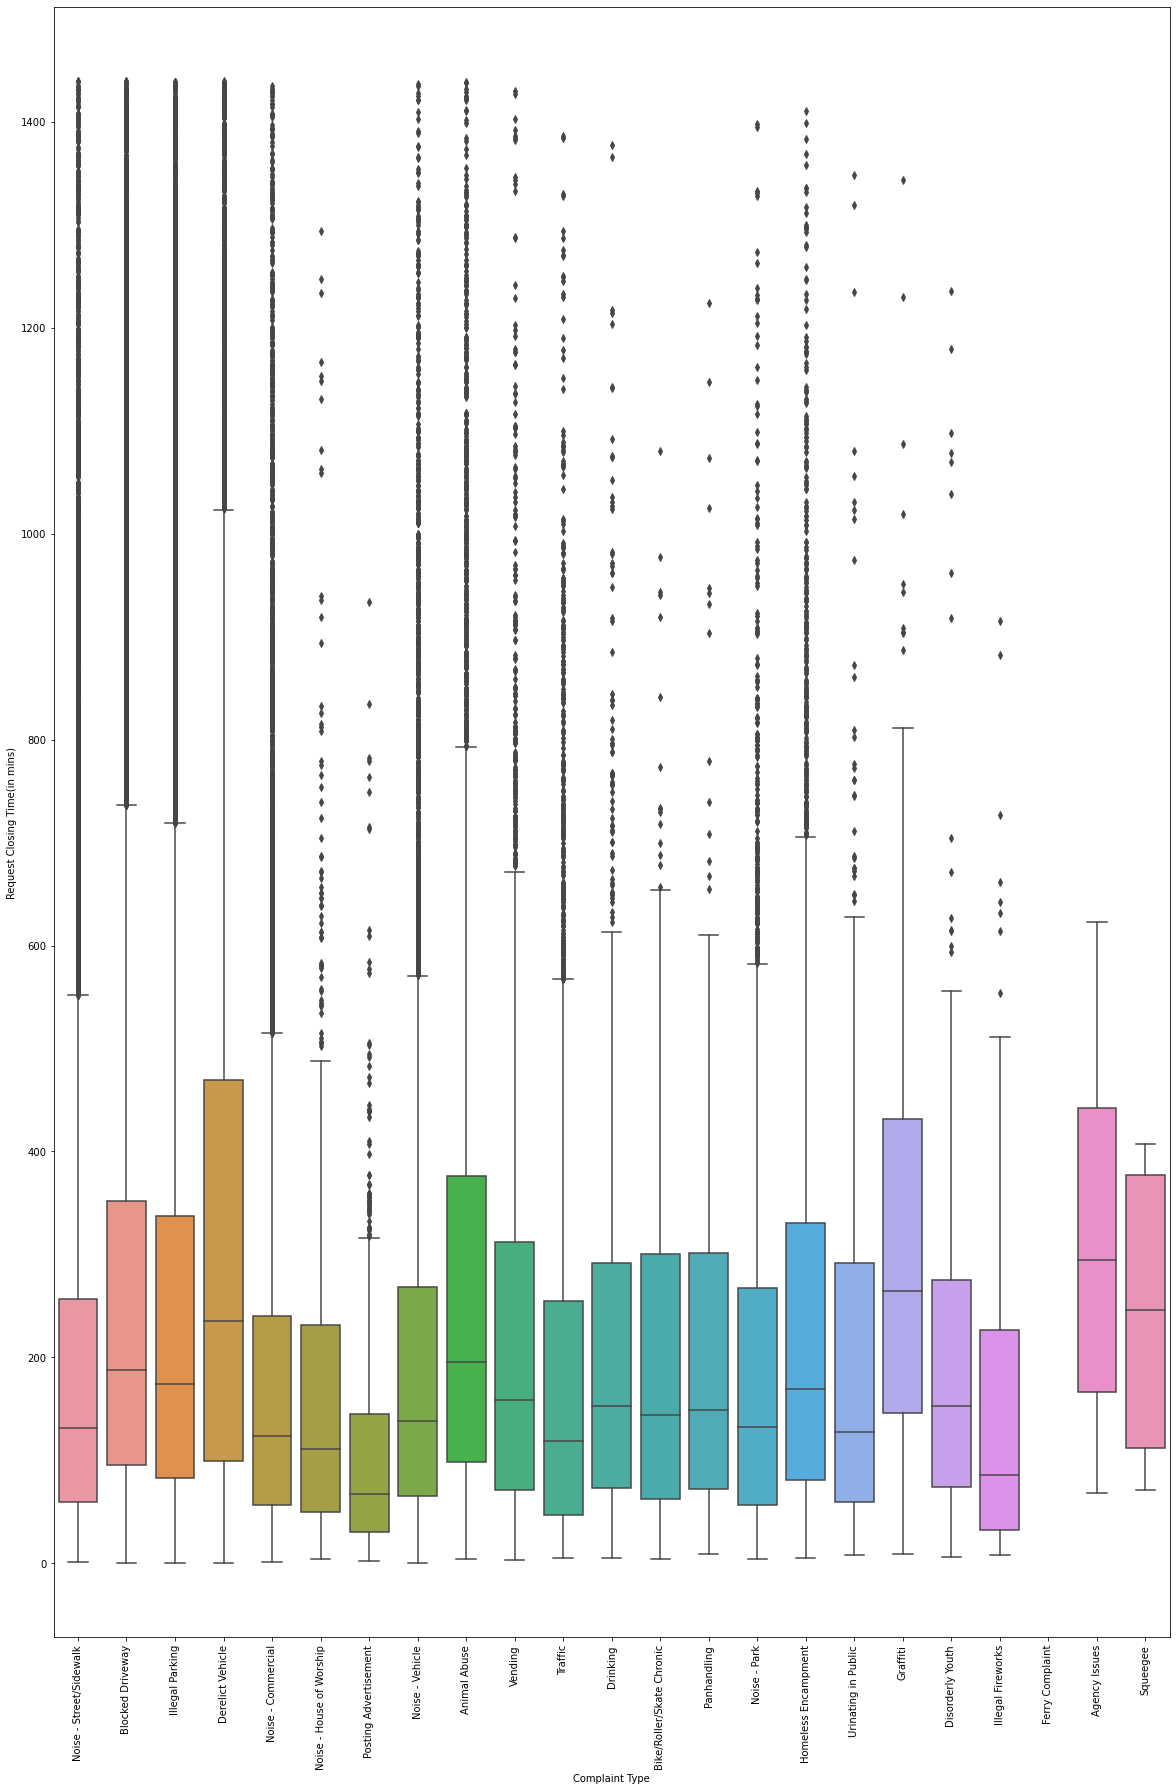

In [34]:
fig,axs = plt.subplots(figsize=(20,30))


plot = sns.boxplot(x='Complaint Type',y='Request Closing Time(in mins)',data=nyc_df,ax=axs)

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

In [35]:
nyc_df['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', 'Ferry'],
      dtype=object)

In [36]:
nyc_df['Location Type'].value_counts()

Street/Sidewalk               249430
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Name: Location Type, dtype: int64

[Text(0, 0, 'Street/Sidewalk'),
 Text(1, 0, 'Club/Bar/Restaurant'),
 Text(2, 0, 'Store/Commercial'),
 Text(3, 0, 'House of Worship'),
 Text(4, 0, 'Residential Building/House'),
 Text(5, 0, 'Residential Building'),
 Text(6, 0, 'Park/Playground'),
 Text(7, 0, 'Vacant Lot'),
 Text(8, 0, 'House and Store'),
 Text(9, 0, 'Highway'),
 Text(10, 0, 'Commercial'),
 Text(11, 0, 'Roadway Tunnel'),
 Text(12, 0, 'Subway Station'),
 Text(13, 0, 'Parking Lot'),
 Text(14, 0, 'Bridge'),
 Text(15, 0, 'Terminal'),
 Text(16, 0, 'Ferry')]

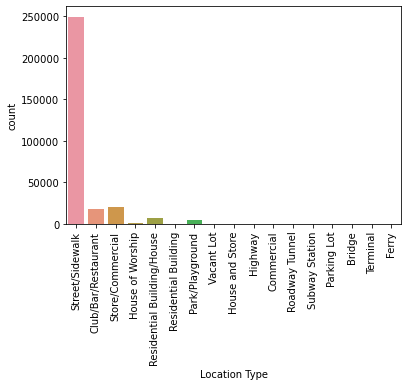

In [37]:
plot = sns.countplot(x='Location Type',data=nyc_df)

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

[Text(0, 0, 'Street/Sidewalk'),
 Text(1, 0, 'Club/Bar/Restaurant'),
 Text(2, 0, 'Store/Commercial'),
 Text(3, 0, 'House of Worship'),
 Text(4, 0, 'Residential Building/House'),
 Text(5, 0, 'Residential Building'),
 Text(6, 0, 'Park/Playground'),
 Text(7, 0, 'Vacant Lot'),
 Text(8, 0, 'House and Store'),
 Text(9, 0, 'Highway'),
 Text(10, 0, 'Commercial'),
 Text(11, 0, 'Roadway Tunnel'),
 Text(12, 0, 'Subway Station'),
 Text(13, 0, 'Parking Lot'),
 Text(14, 0, 'Bridge'),
 Text(15, 0, 'Terminal'),
 Text(16, 0, 'Ferry')]

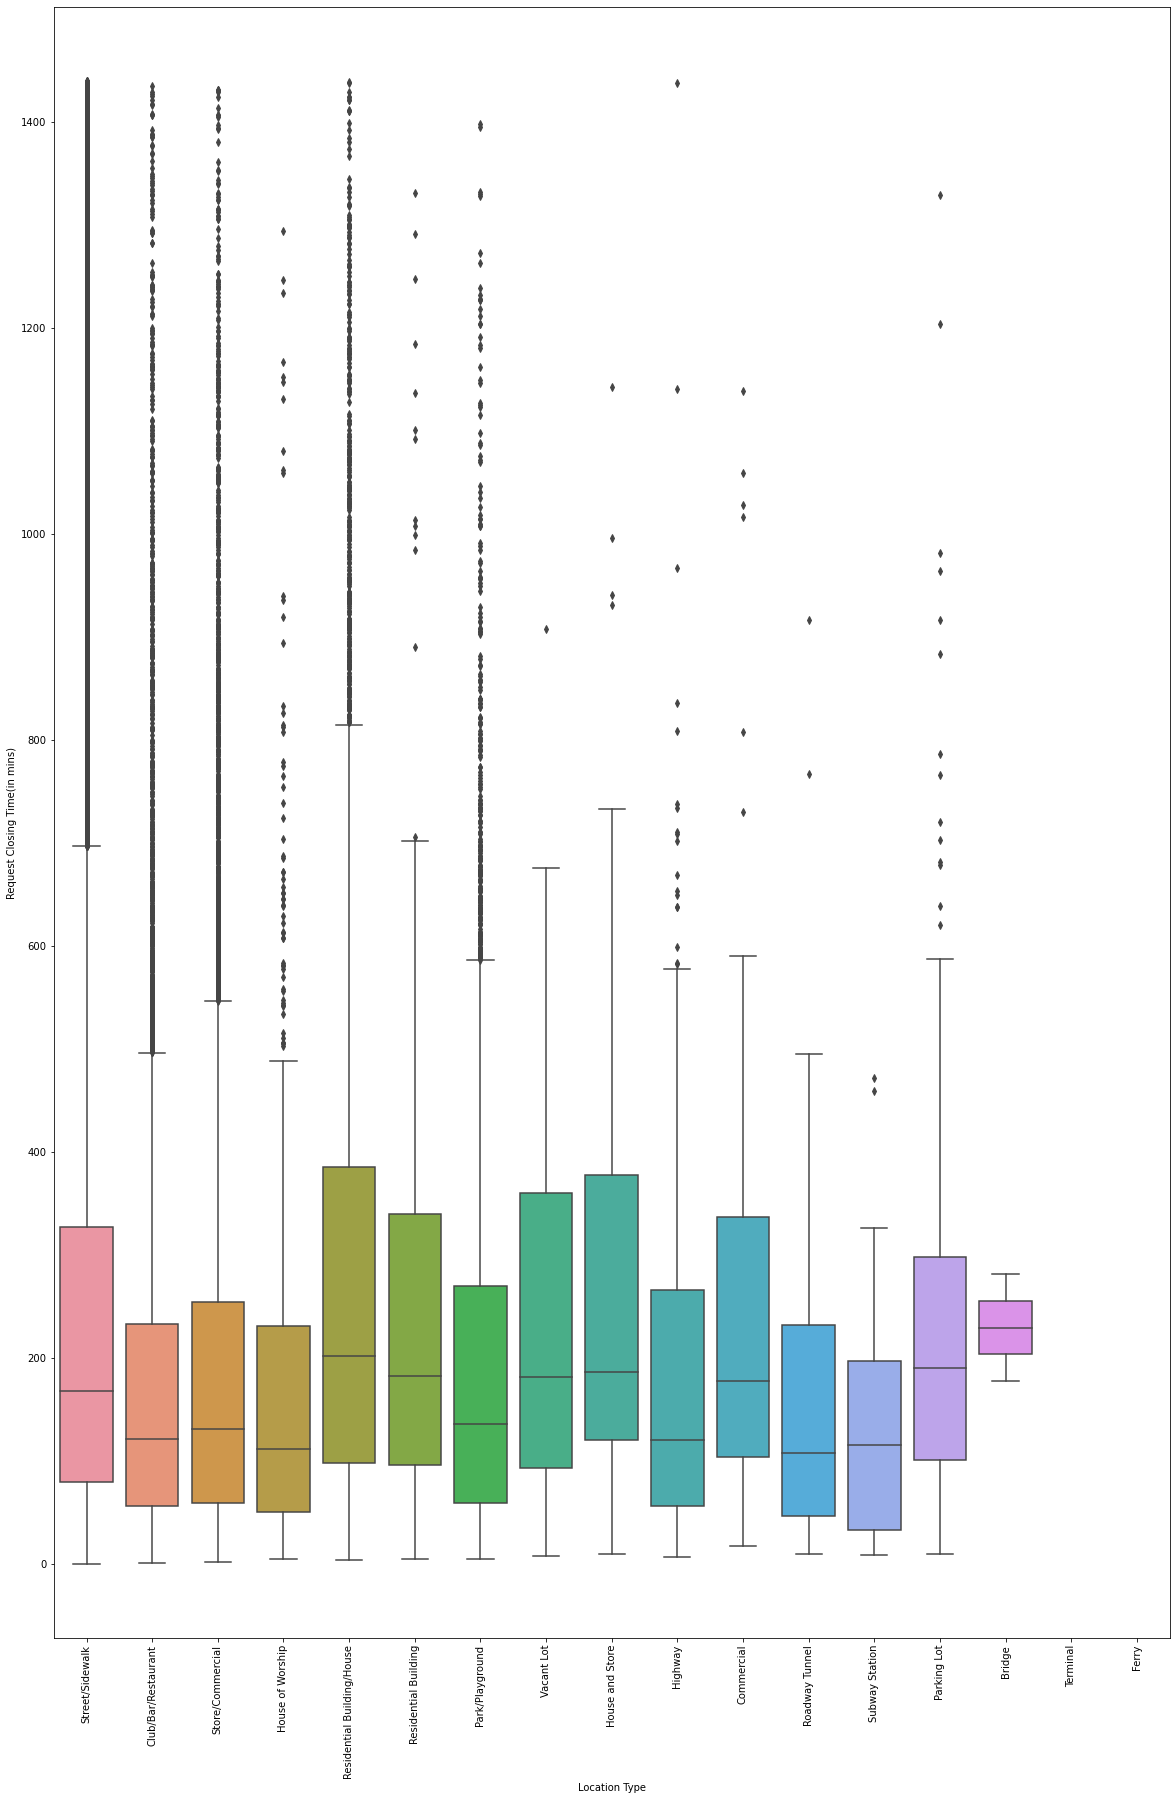

In [38]:
fig,axs = plt.subplots(figsize=(20,30))


plot = sns.boxplot(x='Location Type',y='Request Closing Time(in mins)',data=nyc_df,ax=axs)

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

In [39]:
nyc_df['Borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BRONX', 'BROOKLYN', 'Unspecified',
       'STATEN ISLAND'], dtype=object)

In [40]:
nyc_df['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2573
Name: Borough, dtype: int64

[Text(0, 0, 'MANHATTAN'),
 Text(1, 0, 'QUEENS'),
 Text(2, 0, 'BRONX'),
 Text(3, 0, 'BROOKLYN'),
 Text(4, 0, 'Unspecified'),
 Text(5, 0, 'STATEN ISLAND')]

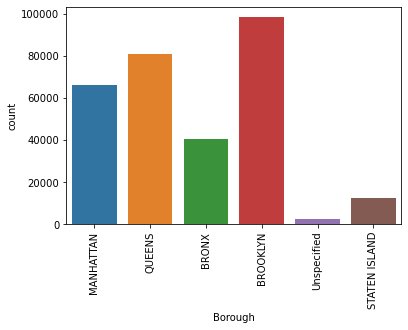

In [41]:
plot = sns.countplot(x='Borough',data=nyc_df)

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

[Text(0, 0, 'MANHATTAN'),
 Text(1, 0, 'QUEENS'),
 Text(2, 0, 'BRONX'),
 Text(3, 0, 'BROOKLYN'),
 Text(4, 0, 'Unspecified'),
 Text(5, 0, 'STATEN ISLAND')]

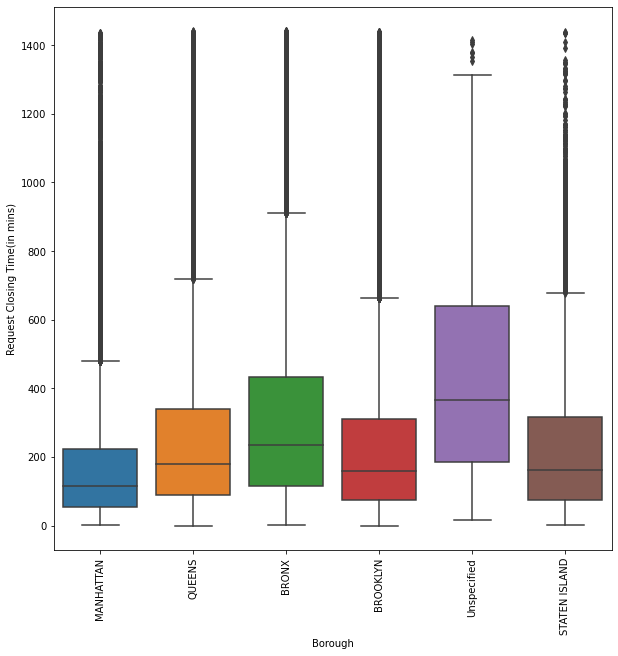

In [42]:
fig,axs = plt.subplots(figsize=(10,10))


plot = sns.boxplot(x='Borough',y='Request Closing Time(in mins)',data=nyc_df,ax=axs)

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

In [50]:
#4. Order complaint types based on average Request Closing Time, group according to Location

In [43]:
nyc_df_Location = nyc_df.groupby(['Location Type'])['Request Closing Time(in mins)'].mean().sort_values()

In [44]:
nyc_df_Location    # from lowest avg time to highest avg time

Location Type
Subway Station                142.250980
Club/Bar/Restaurant           175.040488
House of Worship              177.852697
Roadway Tunnel                184.240000
Store/Commercial              189.527413
Park/Playground               198.044306
Highway                       203.237305
Bridge                        229.158333
Vacant Lot                    242.721212
Street/Sidewalk               243.393844
Parking Lot                   258.591880
Residential Building          263.715492
House and Store               269.827957
Commercial                    274.114516
Residential Building/House    281.753629
Ferry                                NaN
Terminal                             NaN
Name: Request Closing Time(in mins), dtype: float64

In [45]:
#5. Statistical test : Hypothysis Testing

In [50]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [46]:
data_h1 = pd.DataFrame(nyc_df.groupby(['Location Type'])['Request Closing Time(in mins)'].mean())

In [47]:
data_h1

,Request Closing Time(in mins)
Location Type,
Bridge,229.158333
Club/Bar/Restaurant,175.040488
Commercial,274.114516
Ferry,NaN
Highway,203.237305
House and Store,269.827957
House of Worship,177.852697
Park/Playground,198.044306
Parking Lot,258.591880


In [48]:
data_h1.dropna(axis=0,inplace=True) # droped ferry and terminal, as we have assumed that complaints related to them are still open

In [51]:
b = chi2_contingency(data_h1)

In [52]:
b

(0.0,
 1.0,
 0,
 array([[229.15833333],
        [175.0404878 ],
        [274.11451613],
        [203.2373053 ],
        [269.82795699],
        [177.85269687],
        [198.04430646],
        [258.59188034],
        [263.71549192],
        [281.75362913],
        [184.24      ],
        [189.52741251],
        [243.39384353],
        [142.25098039],
        [242.72121212]]))

In [53]:
Statistic_Value = b[0]

In [54]:
alpha = 0.05

In [56]:
p_value = 1 - chi2.cdf(x=Statistic_Value,df=1)

In [57]:
p_value

1.0

In [58]:
print ("Using p-value and the alpha value")

if p_value <= alpha:
    print("Reject H0 i.e., Average response time is similar across complaint types ")
else:
    print("Accept H0 i.e., Average response time is not similar across complaint types ")

Using p-value and the alpha value
Accept H0 i.e., Average response time is not similar across complaint types 


In [59]:
contigency_table = pd.crosstab(nyc_df['Complaint Type'],nyc_df['Location Type'])

In [60]:
contigency_table

Location Type,Bridge,Club/Bar/Restaurant,Commercial,Ferry,Highway,House and Store,House of Worship,Park/Playground,Parking Lot,Residential Building,Residential Building/House,Roadway Tunnel,Store/Commercial,Street/Sidewalk,Subway Station,Terminal,Vacant Lot
Complaint Type,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0
Animal Abuse,0,0,62,0,0,93,0,123,110,227,5085,0,522,1534,22,0,0
Bike/Roller/Skate Chronic,0,0,0,0,0,0,0,0,0,0,26,0,53,348,0,0,0
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,0,0,0,77044,0,0,0
Derelict Vehicle,0,0,0,0,14,0,0,0,0,0,0,5,0,17622,0,0,77
Disorderly Youth,0,0,0,0,0,0,0,0,0,0,77,0,8,201,0,0,0
Drinking,0,366,0,0,0,0,0,98,0,0,291,0,90,435,0,0,0
Ferry Complaint,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
Graffiti,0,0,0,0,0,0,0,0,0,0,56,0,32,25,0,0,0


In [61]:
b2 = chi2_contingency(contigency_table)

In [62]:
b2

(1337534.3808757628,
 0.0,
 352,
 array([[3.99072821e-05, 3.46395208e-01, 1.23712574e-03, 1.99536410e-05,
         4.29003282e-03, 1.85568862e-03, 1.85369325e-02, 9.52387287e-02,
         2.33457600e-03, 4.52947652e-03, 1.38877342e-01, 6.98377436e-04,
         4.06675158e-01, 4.97703668e+00, 6.78423795e-04, 1.99536410e-05,
         1.53643036e-03],
        [5.17331400e-02, 4.49043655e+02, 1.60372734e+00, 2.58665700e-02,
         5.56131255e+00, 2.40559101e+00, 2.40300435e+01, 1.23461139e+02,
         3.02638869e+00, 5.87171139e+00, 1.80031327e+02, 9.05329950e-01,
         5.27186563e+02, 6.45189856e+03, 8.79463380e-01, 2.58665700e-02,
         1.99172589e+00],
        [2.84006824e-03, 2.46517923e+01, 8.80421155e-02, 1.42003412e-03,
         3.05307336e-01, 1.32063173e-01, 1.31921170e+00, 6.77782286e+00,
         1.66143992e-01, 3.22347745e-01, 9.88343748e+00, 4.97011942e-02,
         2.89417154e+01, 3.54199111e+02, 4.82811601e-02, 1.42003412e-03,
         1.09342627e-01],
        [5.12

In [63]:
Statistic_Value2 = b2[0]

In [64]:
alpha2 = 0.05

In [65]:
p_value2 = 1 - chi2.cdf(x=Statistic_Value2,df=2)

In [66]:
p_value2

0.0

In [67]:
print ("Using p-value and the alpha value")

if p_value2 <= alpha2:
    print("Reject H0 i.e., Complaint type and location are related ")
else:
    print("Accept H0 i.e., Complaint type and location are not related ")

Using p-value and the alpha value
Reject H0 i.e., Complaint type and location are related 
